# Introducción
Se cuenta con una base de datos de clientes de un servicio de internet y telefonia, se tienen variables categóricas y caracteristicas de los clientes.
Se quiere hacer un análisis para ver los patrones de los clientes que suelen desertar del servicio

# 📌 Extracción

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [264]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [265]:
customer = df['customer'].to_dict()
customer = pd.DataFrame(customer).transpose()
df_customer = pd.concat([df['customerID'], customer], axis=1)
phone = df['phone'].to_dict()
phone = pd.DataFrame(phone).transpose()
df_phone = pd.concat([df['customerID'], phone], axis=1)
internet = df['internet'].to_dict()
internet = pd.DataFrame(internet).transpose()
df_internet = pd.concat([df['customerID'], internet], axis=1)
account = df['account'].to_dict()
account = pd.DataFrame(account).transpose()
df_account = pd.concat([df['customerID'], account], axis=1)

In [266]:
df_account.head()

,customerID,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


# 🔧 Transformación

In [267]:
df['customerID'].duplicated().sum()

0

In [268]:
df_completo = pd.concat([df['customerID'], df['Churn'],customer, phone, internet, account], axis=1)
df_completo.isnull().sum()


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
dtype: int64

In [269]:
df_completo['Churn'].replace({'': 'Desconocido'}, inplace=True)
columnas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
for col in columnas:
    print(f"{col}: {df_completo[col].unique()}")

Churn: ['No' 'Yes' 'Desconocido']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [270]:
df_cargos = pd.DataFrame(df_account['Charges'].to_dict()).transpose()
df_cargos['Monthly'] = pd.to_numeric(df_cargos['Monthly'], errors='coerce')
df_cargos['Total'] = pd.to_numeric(df_cargos['Total'], errors='coerce')
df_completo = pd.concat([df_completo, df_cargos], axis=1)
df_completo.drop(columns=['Charges'], inplace=True)

In [271]:
df_completo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [272]:
df_completo['tenure']=df_completo['tenure'].astype(int)
df_completo['SeniorCitizen']=df_completo['SeniorCitizen'].astype(int)
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int32  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int32  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [273]:
df_completo['CuentasDiarias'] = df_completo['Monthly'] / 30
df_completo.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333


# 📊 Carga y análisis

In [274]:
df_completo[['tenure', 'Monthly', 'Total', 'CuentasDiarias']].describe()

,tenure,Monthly,Total,CuentasDiarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


<Axes: title={'center': 'Clientes dados de baja'}>

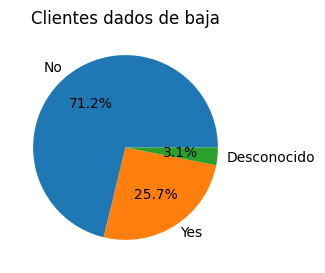

In [275]:
cuenta = df_completo['Churn'].value_counts()
cuenta.plot(
    label='',
    kind='pie',
    autopct='%1.1f%%',
    figsize=(3, 3),
    title='Clientes dados de baja'
)

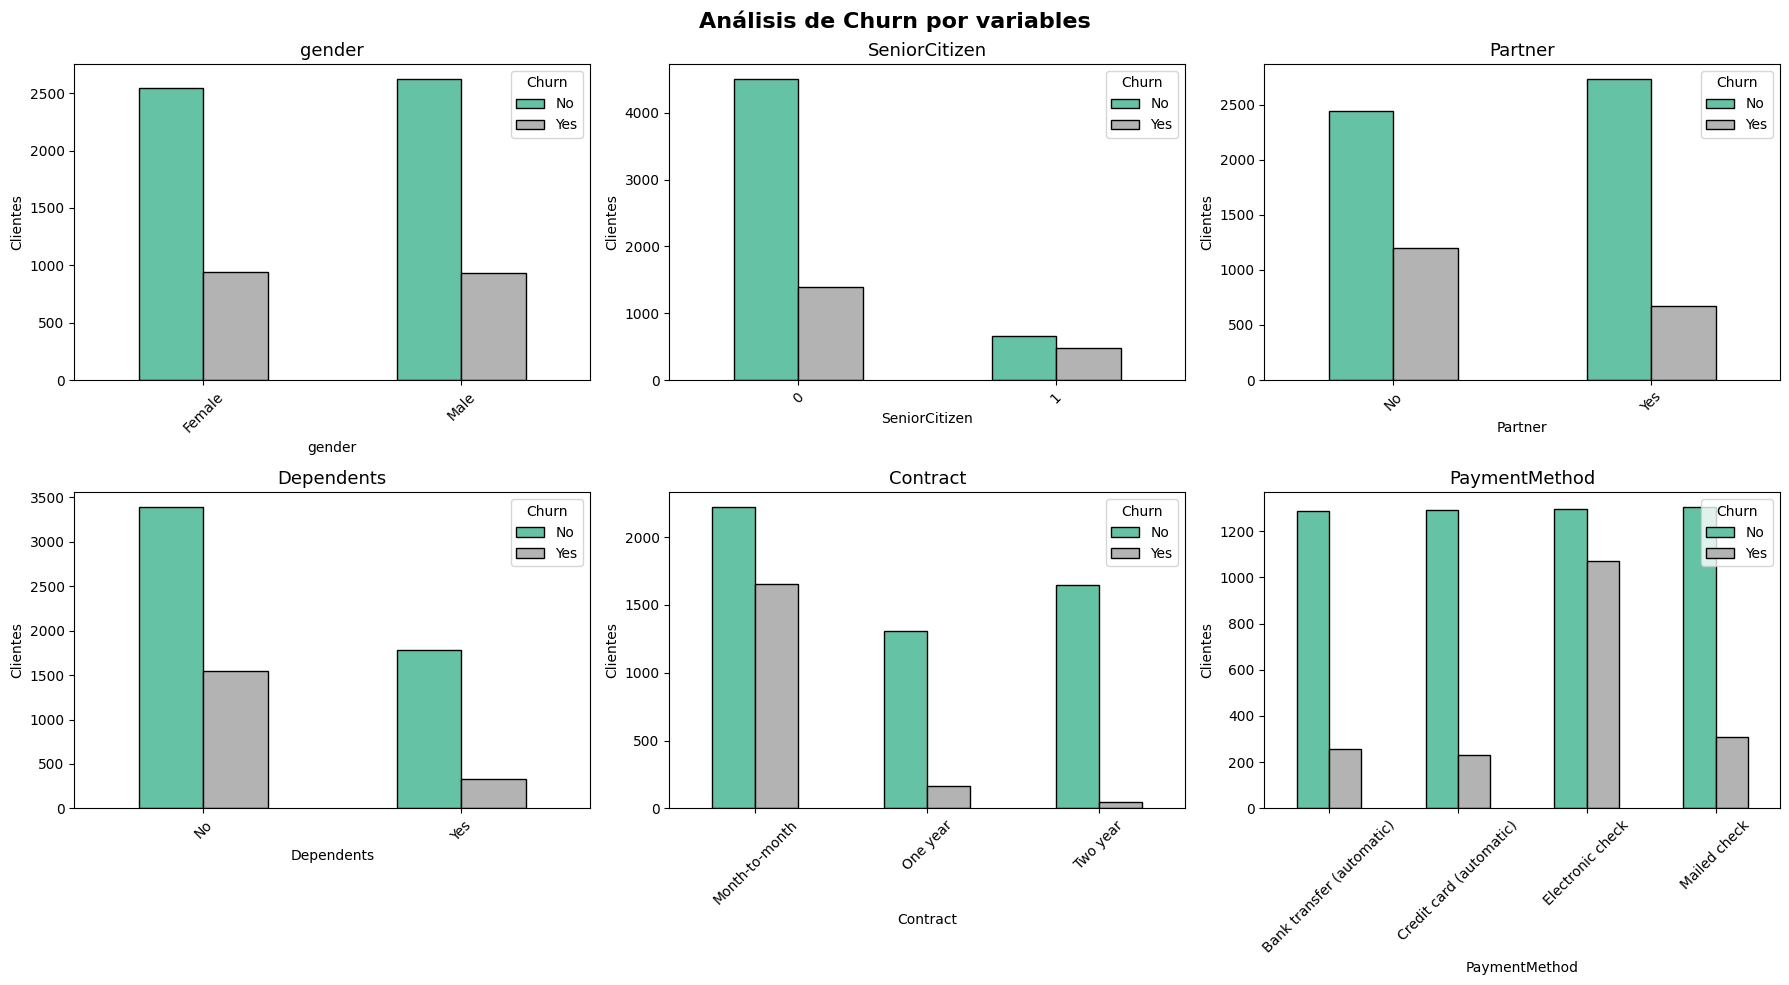

In [283]:
grupos = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
df_completo = df_completo[df_completo['Churn'] != 'Desconocido']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(grupos):
    ax = axes[i]

    tabla = df_completo.groupby([col, 'Churn']).size().unstack(fill_value=0)
    
    tabla.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')
    
    ax.set_title(f'{col}', fontsize=13)
    ax.set_xlabel(col)
    ax.set_ylabel('Clientes')
    ax.legend(title='Churn')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Análisis de Churn por variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

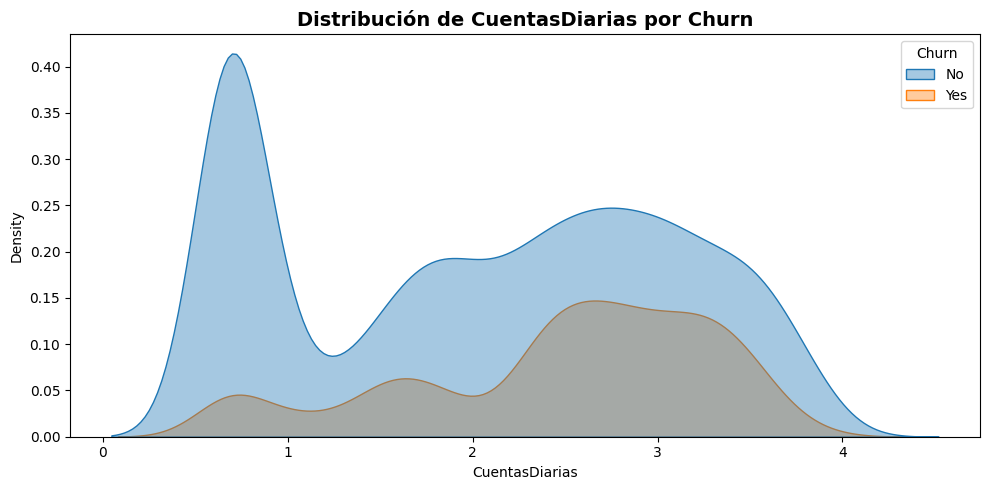

In [277]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df_completo, x='CuentasDiarias', hue='Churn', fill=True, alpha=0.4, ax=ax)

ax.set_title('Distribución de CuentasDiarias por Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('CuentasDiarias')
plt.tight_layout()
plt.show()

C:\Users\PRODHEG\AppData\Local\Temp\ipykernel_17248\1928652124.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df_completo.groupby('rango').agg(


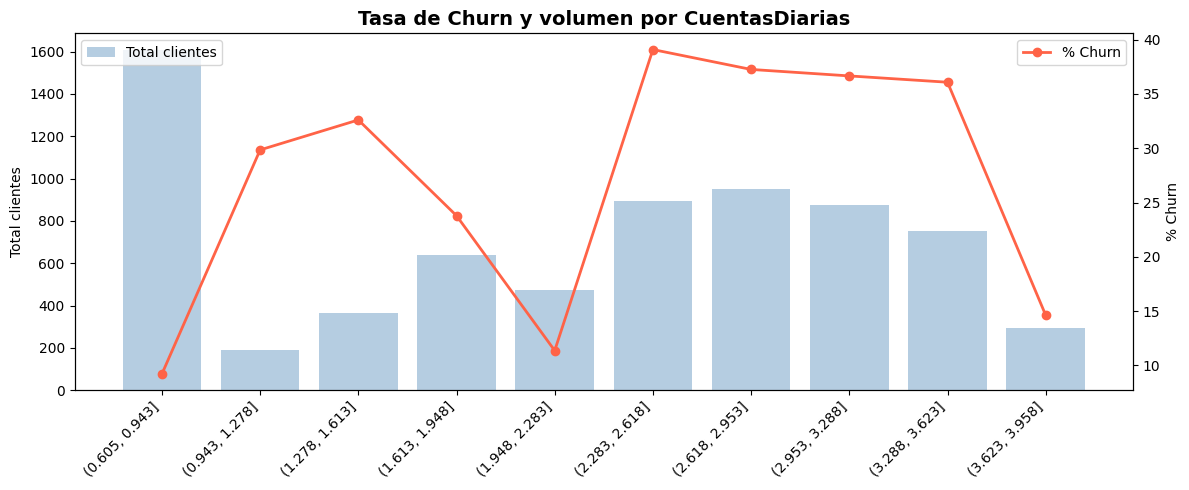

In [285]:
df_completo['Churn_num'] = df_completo['Churn'].map({'No': 0, 'Yes': 1})
df_completo['rango'] = pd.cut(df_completo['CuentasDiarias'], bins=10)
resumen = df_completo.groupby('rango').agg(
    tasa_churn=('Churn_num', 'mean'),
    total=('Churn_num', 'count')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

ax1.bar(resumen.index, resumen['total'], color='steelblue', alpha=0.4, label='Total clientes')
ax2.plot(resumen.index, resumen['tasa_churn'] * 100, color='tomato', marker='o', linewidth=2, label='% Churn')

ax1.set_xticks(resumen.index)
ax1.set_xticklabels(resumen['rango'].astype(str), rotation=45, ha='right')
ax1.set_ylabel('Total clientes')
ax2.set_ylabel('% Churn')
ax1.set_title('Tasa de Churn y volumen por CuentasDiarias', fontsize=14, fontweight='bold')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

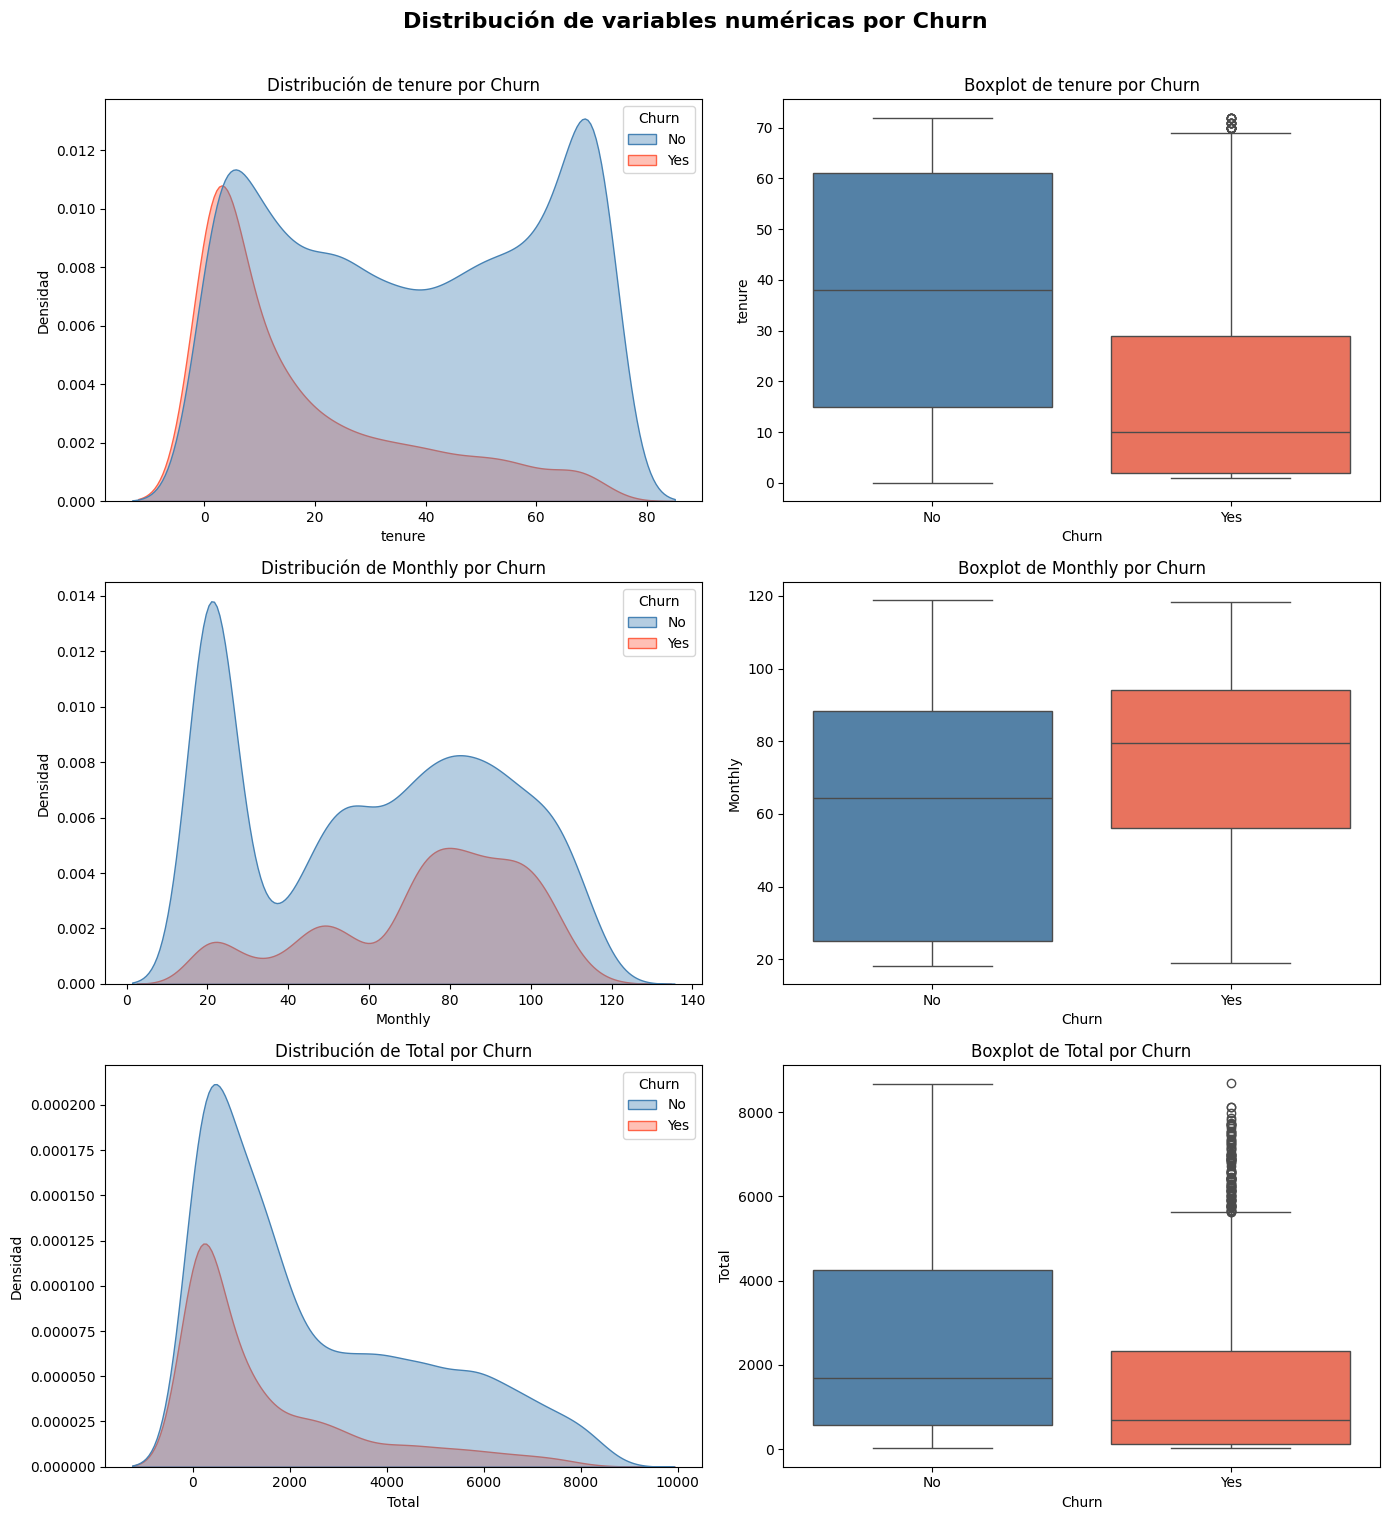

In [302]:
numericas = ['tenure', 'Monthly', 'Total']

fig, axes = plt.subplots(len(numericas), 2, figsize=(14, 5 * len(numericas)))

for i, col in enumerate(numericas):
    
    sns.kdeplot(data=df_completo, x=col, hue='Churn', fill=True, alpha=0.4, ax=axes[i, 0], palette={'Yes': 'tomato', 'No': 'steelblue'})
    axes[i, 0].set_title(f'Distribución de {col} por Churn')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Densidad')

    sns.boxplot(data=df_completo, x='Churn', y=col,
                hue='Churn',
                legend=False,
                palette={'Yes': 'tomato', 'No': 'steelblue'},
                ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {col} por Churn')
    axes[i, 1].set_xlabel('Churn')
    axes[i, 1].set_ylabel(col)

plt.suptitle('Distribución de variables numéricas por Churn', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# 📄Informe final

### Conclusiones
1) Se detectó que no har variabilidad entre el genero de los clientes.
2) Sin embargo se detectó el patrón de que si el cliente es mayor de edad, tiene pareja o tiene dependientes, es menos probable que deje el servicio.
3) Los contratos mensuales propician a que el cliente deje el servicio en contraste a los que hacer contrato por mas tiempo como anual.
4) En cuento a los metodos de pago se detectó que el cheque electrónico tiene más porcentaje de deserción, probablemte a que el cliente requiere un esfuerzo extra para hacer el pago a diferencia a cuando es automático.
5) Se detectó que en los primeros 30 meses de servicio es cuando más desertan los clientes.
6) No se encotnró una correlación significativa en los gastos diarios o mensuales con la tasa de deserción, sin embargo, sí se encontró que conforme los gastos totales ascienden, las tasas de deserción son mayores.

### Recomendaciones
Se propone la extensión del tiempo mínimo del contrato, así como atraer a clientes con mayor estabilidad familiar como hijos y parejas, así como tratar de automatizar los pagos. Se propone el generar un compromiso al servicio aumentando el los gastos totales

# Extra

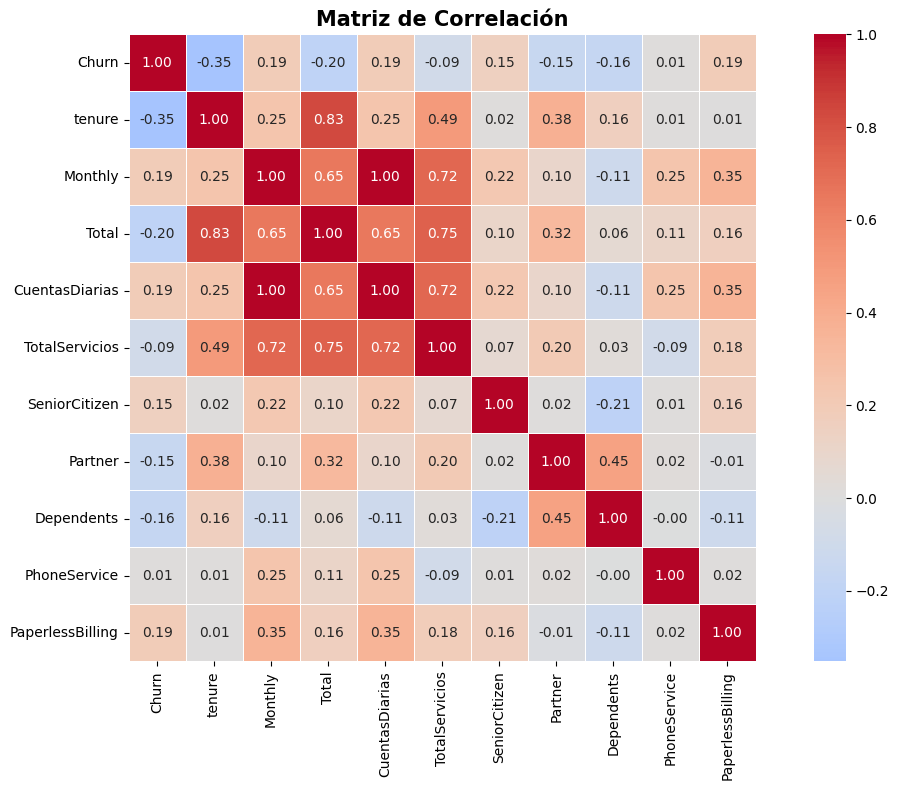

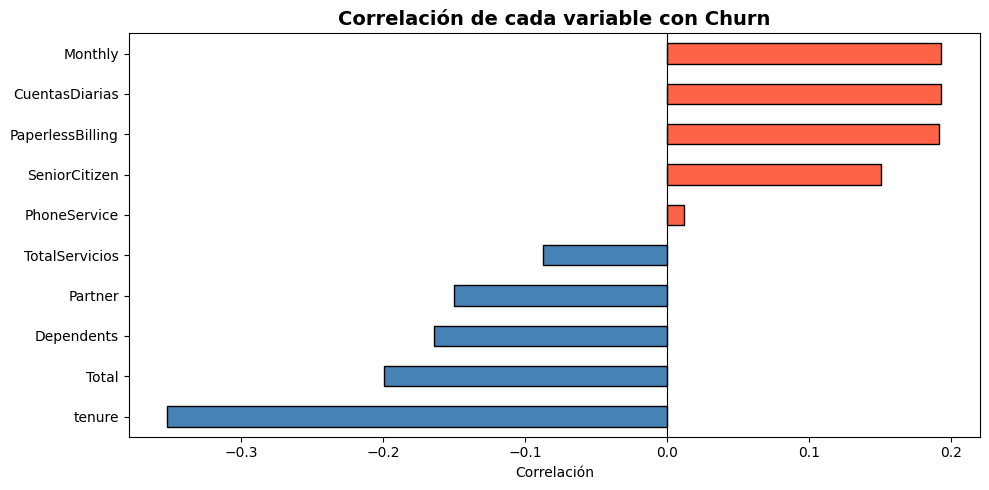


Correlación con Churn (ordenada):
tenure             -0.352
Total              -0.199
Dependents         -0.164
Partner            -0.150
TotalServicios     -0.088
PhoneService        0.012
SeniorCitizen       0.151
PaperlessBilling    0.192
CuentasDiarias      0.193
Monthly             0.193


In [303]:
df_corr = df_completo.copy()

# Binarias Yes/No → 1/0
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binarias:
    df_corr[col] = (df_corr[col] == 'Yes').astype(int)

df_corr['SeniorCitizen'] = df_corr['SeniorCitizen'].astype(int)

# Servicios de internet → contar cuántos tiene cada cliente
servicios = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies']
df_corr['TotalServicios'] = df_corr[servicios].apply(
    lambda col: (col == 'Yes').astype(int)
).sum(axis=1)

# ── Variables finales para correlación ──────────────────────────
cols_corr = ['Churn', 'tenure', 'Monthly', 'Total', 'CuentasDiarias',
             'TotalServicios', 'SeniorCitizen', 'Partner', 'Dependents',
             'PhoneService', 'PaperlessBilling']

corr_matrix = df_corr[cols_corr].corr()

# ── 1. Heatmap de correlación ────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, ax=ax)
ax.set_title('Matriz de Correlación', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# ── 2. Correlación específica con Churn (barras) ─────────────────
corr_churn = corr_matrix['Churn'].drop('Churn').sort_values()

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['tomato' if v > 0 else 'steelblue' for v in corr_churn]
corr_churn.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.axvline(0, color='black', linewidth=0.8)
ax.set_title('Correlación de cada variable con Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlación')
plt.tight_layout()
plt.show()

# ── 3. Resumen en texto ──────────────────────────────────────────
print("\nCorrelación con Churn (ordenada):")
print(corr_churn.round(3).to_string())